# Data Preparation

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import yfinance as yf
import datetime
from dateutil.relativedelta import relativedelta

import ta
from statistics import mean
from sklearn.preprocessing import MinMaxScaler

import util_functions as uf

# Get Data

In [2]:
df = uf.getdata('AAPL',[20, 50],'Close')

[*********************100%%**********************]  1 of 1 completed


In [3]:
df['rsi'] = ta.momentum.rsi(df['Close'])

In [4]:
df['macd'] = ta.trend.macd(df['Close'])

In [5]:
# Calculate the Bollinger Bands
bb = ta.volatility.BollingerBands(close=df['Close'], window=20, window_dev=2)

# Retrieve the upper, middle, and lower bands
df['upper_band'] = bb.bollinger_hband()
df['middle_band'] = bb.bollinger_mavg()
df['lower_band'] = bb.bollinger_lband()

In [6]:
df['stoch_oscillator'] = ta.momentum.stoch(high=df['High'], low=df['Low'], close=df['Close'])

# Remove NA

In [7]:
df = df.dropna(subset=['sma_20','sma_50','stoch_oscillator'])

In [8]:
df['next_day_close'] = df['Close'].shift(-1)

In [9]:
df = df.dropna(subset=['next_day_close'])

In [10]:
df = df.drop(columns='ticker')

# Remove Outliers

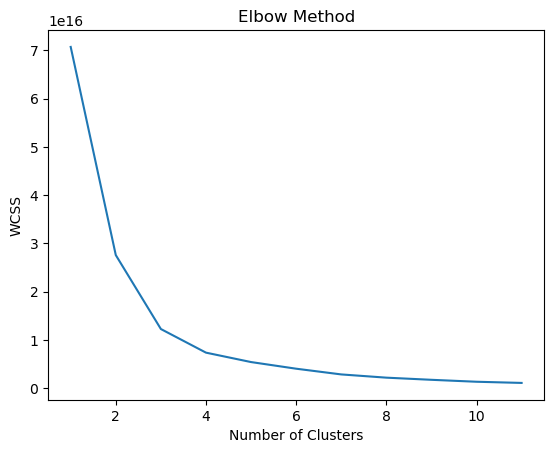

In [11]:
plot_k_clusters = uf.kmeans_elbow_method(df.drop(columns=['Date']))

In [12]:
df_outliers = uf.detect_outliers_kmeans(df.drop(columns='Date'), 4)

In [13]:
len(df_outliers)

38

In [14]:
# Check for location of outliers
df[df.index.isin(df_outliers.index.tolist())]

,Date,Open,High,Low,Close,Volume,sma_20,sma_50,rsi,macd,upper_band,middle_band,lower_band,stoch_oscillator,next_day_close
51,2023-03-17,156.080002,156.740005,154.279999,155.000000,98944600,150.396001,145.981800,60.702342,2.073508,156.261560,150.396001,144.530442,86.448568,157.399994
79,2023-04-27,165.190002,168.559998,165.190002,168.410004,64902300,164.672501,157.616000,64.220344,2.389563,168.813108,164.672501,160.531893,98.291641,169.679993
83,2023-05-03,169.500000,170.919998,167.160004,167.449997,65136000,165.482500,158.919800,59.120676,2.530544,170.697309,165.482500,160.267690,57.265969,165.789993
84,2023-05-04,164.889999,167.039993,164.309998,165.789993,81235400,165.584000,159.257400,54.235637,2.261507,170.739437,165.584000,160.428562,36.822562,173.570007
91,2023-05-15,173.160004,173.210007,171.470001,172.070007,37266700,168.944000,162.799400,60.867411,2.988476,175.671081,168.944000,162.216920,78.626035,172.070007
102,2023-05-31,177.330002,179.350006,176.759995,177.250000,99625300,172.978501,167.476400,66.716936,2.532231,178.343890,172.978501,167.613113,76.483715,180.089996
104,2023-06-02,181.029999,181.779999,179.259995,180.949997,61945900,174.368501,168.355000,72.662530,3.075013,179.606327,174.368501,169.130676,92.693646,179.580002
105,2023-06-05,182.630005,184.949997,178.039993,179.580002,121946500,174.669001,168.768000,67.570186,3.133536,180.359172,174.669001,168.978830,63.042013,179.210007
106,2023-06-06,179.970001,180.119995,177.429993,179.210007,64848400,174.954501,169.147200,66.220413,3.114163,180.946399,174.954501,168.962604,60.495590,177.820007
107,2023-06-07,178.440002,181.210007,177.320007,177.820007,61944600,175.257001,169.538000,61.268783,2.952612,181.185815,175.257001,169.328188,50.589097,180.570007


In [15]:
df = df[~df.index.isin(df_outliers.index.tolist())]

# Scale df

In [16]:
df_x = df.drop(columns=['Date','next_day_close'])
df_y = df[['next_day_close']]

In [17]:
scaler_x = MinMaxScaler()

scaler_x.fit(df_x)
scaled_data_x = scaler_x.transform(df_x)
df_scaled_x = pd.DataFrame(scaled_data_x, columns=df_x.columns)

In [18]:
scaler_y = MinMaxScaler()

scaler_y.fit(df_y)
scaled_data_y = scaler_y.transform(df_y)
df_scaled_y = pd.DataFrame(scaled_data_y, columns=df_y.columns)

In [19]:
df_reset_index = df.reset_index(drop=True).reset_index()

In [20]:
df_scaled_x = df_scaled_x.reset_index()

In [21]:
df_scaled_full_x = pd.merge(left=df_reset_index[['index','Date']],right=df_scaled_x, on='index')

In [22]:
df_scaled_full_x = df_scaled_full_x.drop(columns='index')

# Company Fundamentals

In [218]:
import requests
import json

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=INCOME_STATEMENT&symbol=IBM&apikey=M482KPOEHSDW3G1M'
r = requests.get(url)
data = r.json()

df_normalse = pd.json_normalize(data)

In [219]:
df_quarterly= pd.json_normalize(df_normalse['quarterlyReports'])

In [220]:
df_normalise_2023_q4 = pd.json_normalize(df_quarterly[0])
df_normalise_2023_q3 = pd.json_normalize(df_quarterly[1])
df_normalise_2023_q2 = pd.json_normalize(df_quarterly[2])
df_normalise_2023_q1 = pd.json_normalize(df_quarterly[3])
df_normalise_2022_q4 = pd.json_normalize(df_quarterly[4])
df_normalise_2022_q3 = pd.json_normalize(df_quarterly[5])
df_normalise_2022_q2 = pd.json_normalize(df_quarterly[6])
df_normalise_2022_q1 = pd.json_normalize(df_quarterly[7])


In [221]:
df_comp_fund = pd.concat([df_normalise_2023_q4,df_normalise_2023_q3,df_normalise_2023_q2,df_normalise_2023_q1,
           df_normalise_2022_q4,df_normalise_2022_q3,df_normalise_2022_q2,df_normalise_2022_q1])
           

In [222]:
df_comp_fund = df_comp_fund.drop(columns='reportedCurrency')

In [223]:
scaler = MinMaxScaler()
scaler.fit(df_comp_fund.drop(columns=['fiscalDateEnding','investmentIncomeNet']))
scaled_data = scaler.transform(df_comp_fund.drop(columns=['fiscalDateEnding','investmentIncomeNet']))
df_comp_fund_scaled = pd.DataFrame(scaled_data, columns=df_comp_fund.drop(columns=['fiscalDateEnding','investmentIncomeNet']).columns)

In [224]:
scaled_data.shape

(8, 23)

In [225]:
df_comp_fund_reset_index = df_comp_fund.reset_index(drop=True).reset_index()

In [226]:
df_comp_fund_scaled = df_comp_fund_scaled.reset_index()

In [227]:
df_comp_fund= df_comp_fund_reset_index[['index','fiscalDateEnding']].merge(df_comp_fund_scaled, on='index')

In [228]:
df_comp_fund = df_comp_fund.drop(columns = 'index')

In [229]:
df_comp_fund['fiscalDateEnding'] = pd.to_datetime(df_comp_fund['fiscalDateEnding'])

# Merge Data

In [230]:
df_scaled_full['quarter'] = df_scaled_full['Date'].dt.to_period('Q')

NameError: name 'df_scaled_full' is not defined

In [ ]:
df_comp_fund['quarter'] = df_comp_fund['fiscalDateEnding'].dt.to_period('Q')

In [ ]:
df = df_scaled_full.merge(df_comp_fund, on='quarter', how='left')

# df

In [23]:
df = pd.concat([df_scaled_full_x, df_scaled_y], axis=1)

In [24]:
df

,Date,Open,High,Low,Close,Volume,sma_20,sma_50,rsi,macd,upper_band,middle_band,lower_band,stoch_oscillator,next_day_close
0,2023-03-15,0.000000,0.000000,0.000000,0.000000,0.502585,0.000000,0.000000,0.696554,0.709862,0.000000,0.000000,0.023368,0.734417,0.019717
1,2023-03-16,0.020713,0.069226,0.037197,0.063387,0.489622,0.000591,0.013344,0.782348,0.741675,0.002603,0.000591,0.021829,0.954226,0.000000
2,2023-03-20,0.082853,0.098555,0.091479,0.097739,0.457179,0.007568,0.039799,0.811487,0.786974,0.027558,0.007568,0.009573,0.972741,0.099281
3,2023-03-21,0.130899,0.132629,0.143166,0.139406,0.461002,0.019840,0.052658,0.860655,0.825513,0.058287,0.019840,0.001481,0.995320,0.065646
4,2023-03-22,0.173180,0.191719,0.170631,0.107269,0.483708,0.029975,0.064658,0.788458,0.838693,0.077341,0.029975,0.001268,0.710174,0.091162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,2024-03-08,0.380312,0.441018,0.411332,0.393174,0.489023,0.676897,0.871867,0.110995,0.000000,0.758158,0.676897,0.535201,0.132756,0.411737
210,2024-03-11,0.464446,0.455683,0.478590,0.437943,0.283332,0.658603,0.863023,0.229191,0.010559,0.734595,0.658603,0.524510,0.255616,0.422872
211,2024-03-12,0.468930,0.448135,0.456098,0.448581,0.279287,0.642786,0.854200,0.256266,0.029036,0.713330,0.642786,0.516180,0.284810,0.374159
212,2024-03-13,0.460816,0.430020,0.450692,0.402039,0.184822,0.626980,0.844923,0.194187,0.029536,0.699470,0.626980,0.500298,0.157086,0.417537


In [25]:
#df = df.drop(columns=['Date','quarter'])
df = df.drop(columns=['Date'])

# Feature engineering

In [26]:
# Calculate the correlation coefficients between market indicators and stock prices
correlation_matrix = df.corr()
correlation_with_stock_prices = correlation_matrix['next_day_close'].dropna()
relevant_indicators = correlation_with_stock_prices[abs(correlation_with_stock_prices) > 0.5].index.tolist()

# Identify relevant indicators

In [27]:
relevant_indicators

['Open',
 'High',
 'Low',
 'Close',
 'sma_20',
 'sma_50',
 'upper_band',
 'middle_band',
 'lower_band',
 'next_day_close']

In [28]:
import statsmodels.formula.api as sm


# Train Model

In [29]:
# Check for NaN values
nan_locations = df.isna().any()

# Get the columns with NaN values
columns_with_nan = nan_locations[nan_locations].index.tolist()

# Get the rows with NaN values
rows_with_nan = df[df.isna().any(axis=1)].index.tolist()


In [30]:
df = df.fillna(0)

In [31]:
df_raw = df.copy()

# Check for overfitting

In [240]:
df

,Open,High,Low,Close,Volume,sma_20,sma_50,rsi,macd,upper_band,middle_band,lower_band,stoch_oscillator,next_day_close
0,0.000000,0.000000,0.000000,0.000000,0.502585,0.000000,0.000000,0.696554,0.709862,0.000000,0.000000,0.023368,0.734417,0.019717
1,0.020713,0.069226,0.037197,0.063387,0.489622,0.000591,0.013344,0.782348,0.741675,0.002603,0.000591,0.021829,0.954226,0.000000
2,0.082853,0.098555,0.091479,0.097739,0.457179,0.007568,0.039799,0.811487,0.786974,0.027558,0.007568,0.009573,0.972741,0.099281
3,0.130899,0.132629,0.143166,0.139406,0.461002,0.019840,0.052658,0.860655,0.825513,0.058287,0.019840,0.001481,0.995320,0.065646
4,0.173180,0.191719,0.170631,0.107269,0.483708,0.029975,0.064658,0.788458,0.838693,0.077341,0.029975,0.001268,0.710174,0.091162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,0.380312,0.441018,0.411332,0.393174,0.489023,0.676897,0.871867,0.110995,0.000000,0.758158,0.676897,0.535201,0.132756,0.411737
210,0.464446,0.455683,0.478590,0.437943,0.283332,0.658603,0.863023,0.229191,0.010559,0.734595,0.658603,0.524510,0.255616,0.422872
211,0.468930,0.448135,0.456098,0.448581,0.279287,0.642786,0.854200,0.256266,0.029036,0.713330,0.642786,0.516180,0.284810,0.374159
212,0.460816,0.430020,0.450692,0.402039,0.184822,0.626980,0.844923,0.194187,0.029536,0.699470,0.626980,0.500298,0.157086,0.417537


In [242]:
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Set the window size and step size for cross-validation
window_size = 100
step_size = 10

# Initialize lists to store the performance metrics
mse_scores_test = []
mse_scores_train = []


for i in relevant_indicators[:-1]:

    mse_scores_test = []
    mse_scores_train = []
    
    df_temp = df[relevant_indicators].drop(columns=i)    
    # Perform rolling window cross-validation
    for start in range(0, len(df) - window_size + 1, step_size):
        
        end = start + window_size
        
        # Split the data into training and validation sets
        train_data = df_temp.iloc[start:end]
        test_data = df_temp.iloc[end:end+step_size]

        train_data_endog = train_data['next_day_close']
        train_data_exog = train_data.drop(columns='next_day_close')

        test_data_endog = test_data['next_day_close']
        test_data_exog = test_data.drop(columns='next_day_close')
        
        # Fit the ARIMAX model
        model = ARIMA(endog=train_data_endog, exog=train_data_exog, order=(0, 0, 0))
        model_fit = model.fit()

        # Make predictions
        test_predictions = model_fit.get_forecast(steps=len(test_data), exog=test_data_exog)
        train_predictions = model_fit.get_forecast(steps=len(train_data), exog=train_data_exog)

        val_predictions_mean = test_predictions.predicted_mean
        val_predictions_mean = val_predictions_mean.values.reshape(-1,1)
        test_pred = scaler_y.inverse_transform(val_predictions_mean)

        test_endo = test_data_endog.values.reshape(-1,1)
        test_endo = scaler_y.inverse_transform(test_endo)

        train_predictions_mean = train_predictions.predicted_mean
        train_pred = train_predictions_mean.values.reshape(-1,1)
        train_pred = scaler_y.inverse_transform(train_pred)

        train_endo = train_data_endog.values.reshape(-1,1)
        train_endo = scaler_y.inverse_transform(train_endo)

        #Calculate mean squared error (MSE) as the performance metric
        mse_test = mean_squared_error(test_endo, test_pred)
        mse_scores_test.append(round(mse_test,4))

        mse_train = mean_squared_error(train_endo, train_pred)
        mse_scores_train.append(round(mse_train,4))

    print("Remove {} = {}\n{}".format(i,mse_scores_test,mse_scores_train))

Remove Open = [13.6441, 3.7759, 2.4344, 5.0786, 3.172, 3.7972, 2.6867, 8.7474, 5.3524, 0.7963, 3.7714, 2.6594]
[4.0537, 4.7213, 4.6041, 4.5216, 4.7513, 4.7852, 4.8427, 4.8205, 5.2466, 4.8528, 4.2033, 3.7383]
Remove High = [13.5527, 3.663, 2.3987, 5.0517, 3.0239, 3.2962, 2.3817, 8.7164, 5.9114, 0.7937, 4.0935, 2.6357]
[4.0412, 4.7228, 4.5892, 4.4925, 4.697, 4.7105, 4.7597, 4.6874, 5.1107, 4.8204, 4.1913, 3.7501]
Remove Low = [14.2322, 3.7459, 2.4435, 5.5603, 2.6581, 3.2883, 2.7168, 9.2431, 5.2647, 0.9431, 3.8898, 2.5722]
[4.0316, 4.7203, 4.5996, 4.515, 4.8035, 4.7513, 4.8104, 4.8296, 5.3102, 4.8519, 4.1994, 3.7485]
Remove Close = [14.2616, 4.6616, 3.9928, 7.1181, 2.214, 5.1059, 5.3993, 11.8243, 5.0521, 1.5097, 2.7595, 1.1168]
[4.5383, 5.0527, 5.0813, 5.1624, 5.5693, 5.4205, 5.6477, 5.8467, 6.6598, 5.7639, 5.0402, 4.6571]
Remove sma_20 = [14.1607, 3.7403, 2.3829, 5.1423, 3.0128, 2.9907, 2.1748, 8.6086, 6.4161, 0.88, 4.3838, 2.8466]
[4.0307, 4.7198, 4.5888, 4.4843, 4.6924, 4.6916, 4.7211,

In [32]:
df = df[relevant_indicators].drop(columns='Close')

# Find Best Order

In [33]:
train_size = int(len(df) * 0.8)  # 80% for training
train_data = df[:train_size]
test_data = df[train_size:]

In [34]:
train_data_endog = train_data['next_day_close']
train_data_exog = train_data.drop(columns='next_day_close')

In [35]:
test_data_endog = test_data['next_day_close']
test_data_exog = test_data.drop(columns='next_day_close')

# ARIMA Model Prediction

In [39]:
from sklearn.metrics import accuracy_score
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")


for p in range(3):
        for d in range(2):
                for q in range(3):
                
                    model = ARIMA(endog=train_data_endog, exog=train_data_exog, order=(p, d, q))
                    model_fit = model.fit()

                    # Forecast on the test data
                    forecast = model_fit.get_forecast(steps=len(test_data), exog=test_data_exog)

                    # Get the predicted values
                    predicted_values = forecast.predicted_mean
                    val_predictions_mean = predicted_values.values.reshape(-1,1)
                    test_pred = scaler_y.inverse_transform(val_predictions_mean)
                    test_pred_series = pd.Series(test_pred.flatten())

                    # Calculate the price change from the predicted values
                    predicted_price_change = test_pred_series.diff()

                    # Create a binary target variable indicating if the price change is positive (1) or not (0)
                    predicted_price_up = (predicted_price_change > 0).astype(int)

                    # Calculate the actual price change from the test data
                    actual_price_change = df_y[train_size:].diff()

                    # Create a binary target variable for the actual price change
                    actual_price_up = (actual_price_change > 0).astype(int)

                    # Calculate the accuracy of the predictions
                    accuracy = accuracy_score(actual_price_up, predicted_price_up)

                    #Print the accuracy
                    print(f"Accuracy of order ({p},{d},{q}): {accuracy}")

Accuracy of order (0,0,0): 0.5813953488372093
Accuracy of order (0,0,1): 0.5813953488372093
Accuracy of order (0,0,2): 0.5813953488372093
Accuracy of order (0,1,0): 0.5348837209302325
Accuracy of order (0,1,1): 0.5348837209302325
Accuracy of order (0,1,2): 0.5581395348837209
Accuracy of order (1,0,0): 0.6046511627906976
Accuracy of order (1,0,1): 0.6046511627906976
Accuracy of order (1,0,2): 0.6046511627906976
Accuracy of order (1,1,0): 0.5348837209302325
Accuracy of order (1,1,1): 0.5348837209302325
Accuracy of order (1,1,2): 0.5348837209302325
Accuracy of order (2,0,0): 0.627906976744186
Accuracy of order (2,0,1): 0.5813953488372093
Accuracy of order (2,0,2): 0.5813953488372093
Accuracy of order (2,1,0): 0.5348837209302325
Accuracy of order (2,1,1): 0.5348837209302325
Accuracy of order (2,1,2): 0.5348837209302325


# SARIMA Model

In [143]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Specify the order and seasonal order of the SARIMA model
order = (2, 0, 0)  # (p, d, q)
seasonal_order = (1, 0, 0, 30)  # (P, D, Q, seasonal_periods)

# Create the SARIMA model
model = SARIMAX(endog=train_data_endog, exog=train_data_exog, order=order, seasonal_order=seasonal_order)

# Fit the SARIMA model
results = model.fit()

# Forecast on the test data
forecast = results.get_forecast(steps=len(test_data), exog=test_data_exog)

# Get the predicted mean values
predicted_values = forecast.predicted_mean

# Calculate the price change from the predicted values
predicted_price_change = np.diff(predicted_values)

# Create a binary target variable indicating if the price change is positive (1) or not (0)
predicted_price_up = (predicted_price_change > 0).astype(int)

# Calculate the actual price change from the test data
actual_price_change = np.diff(test_data['next_day_close'])

# Create a binary target variable for the actual price change
actual_price_up = (actual_price_change > 0).astype(int)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(actual_price_up, predicted_price_up)

# Print the accuracy
print(f"Accuracy: {accuracy}")

Accuracy: 0.6190476190476191
